In [6]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from plotnine import *
import re

import folium


In [3]:
park=pd.read_csv('../testData/전국도시공원표준데이터.csv',encoding='euc-kr')

In [ ]:
park.head(2)

In [21]:
park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [ ]:
#park.isnull().sum()
import missingNo as msno
msno.matrix(park)

In [27]:
park.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명',   'Unnamed: 19'],inplace=True)

In [29]:
park.tail()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명
18132,28140-00009,송림4공원,어린이공원,NaN,인천광역시 동구 송림동 291-6,37.478715,126.653257,412.9,032-770-6205,2019-07-30,3500000,인천광역시 동구
18133,47760-00002,서부공원,근린공원,NaN,경상북도 영양군 영양읍 서부리 123,36.660456,129.114953,56045.0,054-680-6340,2019-09-05,5170000,경상북도 영양군
18134,47760-00003,입암공원,근린공원,NaN,경상북도 영양군 입암면 신구리 산27-5,36.594802,129.093007,109262.0,054-680-6340,2019-09-05,5170000,경상북도 영양군
18135,47760-00004,수비공원,근린공원,NaN,경상북도 영양군 수비면 발리리 산48,36.761440,129.200011,67159.0,054-680-6340,2019-09-05,5170000,경상북도 영양군
18136,47760-00005,삼지연꽃 테마파크,수변공원,NaN,경상북도 영양군 영양읍 삼지리 200,36.662816,129.129372,380000.0,054-680-6340,2019-09-05,5170000,경상북도 영양군


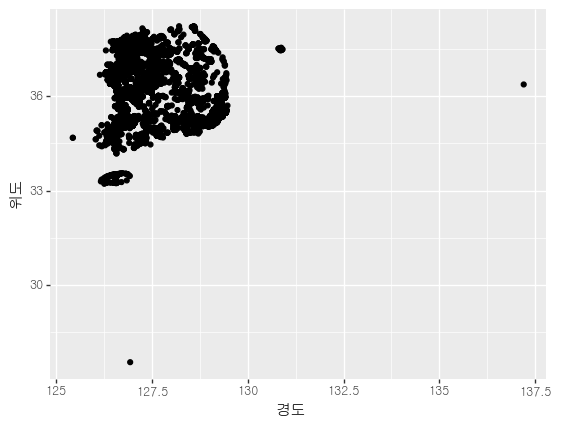

<ggplot: (-9223371903630044976)>

In [10]:
(ggplot(park)
  + aes(x='경도',y='위도')
  + geom_point()
  + theme(text = element_text(family='gulim'))
)

결측지 대체  
아웃라이어 제거 또는 대체  

In [34]:
park.dtypes

관리번호         object
공원명          object
공원구분         object
소재지도로명주소     object
소재지지번주소      object
위도          float64
경도          float64
공원면적        float64
전화번호         object
데이터기준일자      object
제공기관코드       object
제공기관명        object
dtype: object

In [36]:
park['공원면적비율']=park['공원면적'].apply(lambda x: np.sqrt(x)*0.01)

In [39]:
park['소재지도로명주소'].isnull().sum()

10098

In [50]:
park.loc[(park.소재지도로명주소.isnull()) & (park.소재지지번주소.notnull())].shape

(0, 13)

In [41]:
park.소재지도로명주소.fillna(park.소재지지번주소, inplace=True)

In [51]:
park['시도']=park.소재지도로명주소.str.split(' ',expand=True)[0]

In [53]:
park['구군']=park.소재지도로명주소.str.split(' ',expand=True)[1]

In [70]:
park[park.시도.str.contains('서울')]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,시도,구군
213,11710-00001,가락,근린공원,서울특별시 송파구 양재대로64길 42,서울특별시 송파구 가락동 37,37.498469,127.125124,27648.2,02-2147-3380,2019-05-31,3230000,서울특별시 송파구,1.662775,서울특별시,송파구
214,11710-00002,개나리,근린공원,서울특별시 송파구 잠실동 44-6,서울특별시 송파구 잠실동 44-6,37.507553,127.094089,6669.1,02-2147-3380,2019-05-31,3230000,서울특별시 송파구,0.816646,서울특별시,송파구
215,11710-00003,개롱,근린공원,서울특별시 송파구 동남로 178,서울특별시 송파구 가락동 195,37.493407,127.130026,21544.4,02-2147-3380,2019-05-31,3230000,서울특별시 송파구,1.467801,서울특별시,송파구
216,11710-00004,거여,근린공원,서울특별시 송파구 오금로51길 20,서울특별시 송파구 거여동 11,37.497007,127.140981,16185.1,02-2147-3380,2019-05-31,3230000,서울특별시 송파구,1.272207,서울특별시,송파구
217,11710-00005,건너말,근린공원,서울특별시 송파구 중대로10길 29,서울특별시 송파구 가락동 110,37.491603,127.123473,11327.8,02-2147-3380,2019-05-31,3230000,서울특별시 송파구,1.064321,서울특별시,송파구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18033,11590-00046,꽃담길,소공원,서울특별시 동작구 상도동 25-8,서울특별시 동작구 상도동 25-8,37.505644,126.942102,206.0,NaN,2019-02-20,3190000,서울특별시 동작구,0.143527,서울특별시,동작구
18034,11590-00047,흑석,소공원,서울특별시 동작구 흑석동 186-135,서울특별시 동작구 흑석동 186-135,37.509385,126.957863,442.0,NaN,2019-02-20,3190000,서울특별시 동작구,0.210238,서울특별시,동작구
18035,11590-00048,꿈나래,어린이공원,서울특별시 동작구 상도동 36-1,서울특별시 동작구 상도동 36-1,37.505268,126.948180,1720.2,NaN,2019-02-20,3190000,서울특별시 동작구,0.414753,서울특별시,동작구
18036,11590-00049,새빛,소공원,서울특별시 동작구 사당동 164-1,서울특별시 동작구 사당동 164-1,37.487382,126.974669,1680.0,NaN,2019-02-20,3190000,서울특별시 동작구,0.409878,서울특별시,동작구


In [59]:
park_loc_notnull=park.loc[(park.위도>32) & (park.경도 < 132) & (park.시도.notnull())]

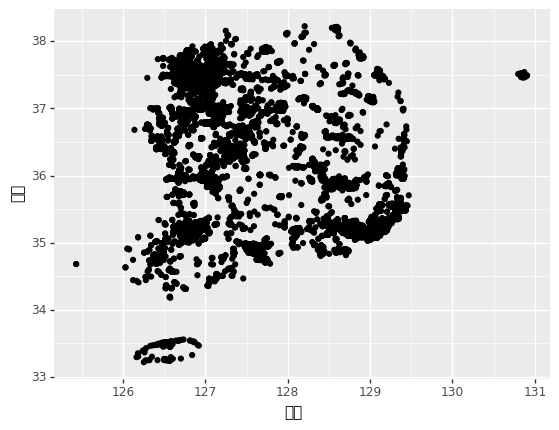

<ggplot: (-9223371921242870000)>

In [60]:
(ggplot(park_loc_notnull)
  + aes(x='경도',y='위도')
  + geom_point()
  + theme(text = element_text(family='NanumBarunGothic'))
)

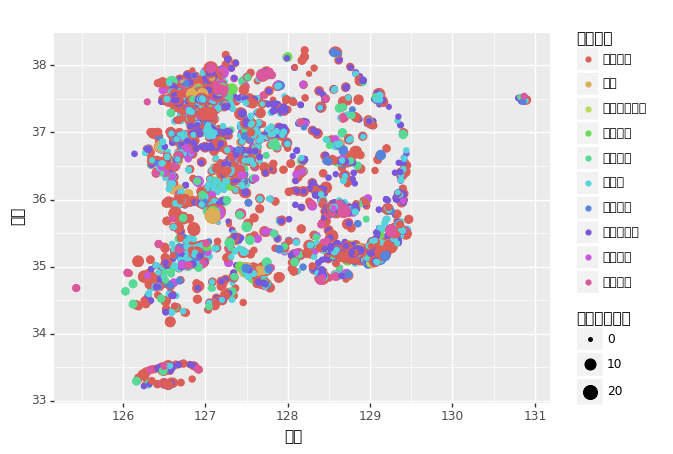

<ggplot: (-9223371921242943952)>

In [62]:
(ggplot(park_loc_notnull)
  + aes(x='경도',y='위도',color='공원구분',size='공원면적비율')
  + geom_point()
  + theme(text = element_text(family='NanumBarunGothic'))
)

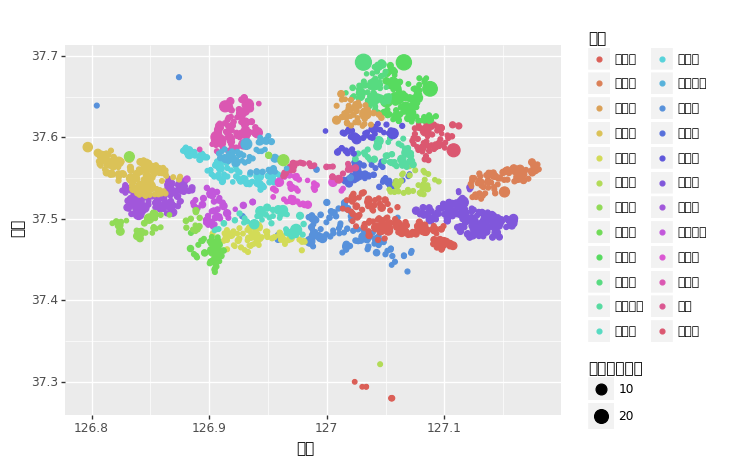

<ggplot: (-9223371921243768868)>

In [73]:
(ggplot(park_loc_notnull[park_loc_notnull.시도.str.contains('서울')])
  + aes(x='경도',y='위도',color='구군',size='공원면적비율')
  + geom_point()
  + theme(text = element_text(family='NanumBarunGothic'))
  + scale_fill_gradient(low='blue',high='green')
)

In [78]:
brand=pd.read_csv('../testData/점포위치.csv',encoding='euc-kr')

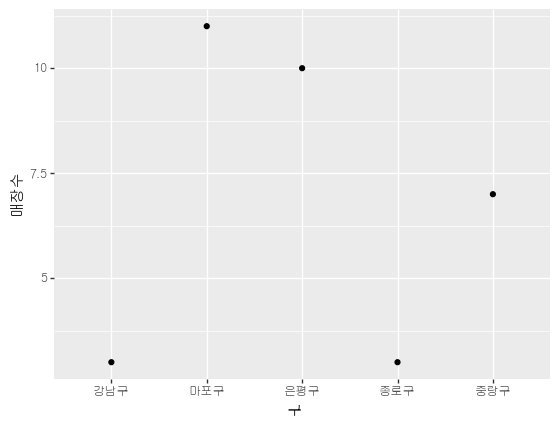

<ggplot: (-9223371921240807236)>

In [81]:
(ggplot(brand)
  + aes(x='구',y='매장수')
  + geom_point()
  + theme(text = element_text(family='gulim'))
  + scale_fill_gradient(low='blue',high='green')
)

# folium